In [12]:
import pandas as pd
import numpy as np
import os

import sklearn.neighbors
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import OrderedDict

In [2]:
import numpy as np
import pandas as pd
import os
import sklearn.linear_model
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import KFold
import sklearn.ensemble
import matplotlib
import matplotlib.pyplot as plt
data_dir = 'data_reviews'
x_train_df = pd.read_csv(os.path.join(data_dir, 'x_train.csv'))
y_train_df = pd.read_csv(os.path.join(data_dir, 'y_train.csv'))

N, n_cols = x_train_df.shape
print("Shape of x_train_df: (%d, %d)" % (N,n_cols))
print("Shape of y_train_df: %s" % str(y_train_df.shape))

# Print out the first five rows and last five rows
tr_text_list = x_train_df['text'].values.tolist()

Shape of x_train_df: (2400, 2)
Shape of y_train_df: (2400, 1)


In [3]:
zip_file_path = os.path.join(
        'pretrained_embedding_vectors/',
        'glove.6B.50d.txt.zip')

word_embeddings = pd.read_csv(
    zip_file_path,
    header=None, sep=' ', index_col=0,
    nrows=100000, compression='zip', encoding='utf-8', quoting=3)

# Build a dict that will map from string word to 50-dim vector
word_list = word_embeddings.index.values.tolist()
word2vec = OrderedDict(zip(word_list, word_embeddings.values))

# Show some examples of word embeddings
# Each word will get mapped to a 
n_words = len(word2vec.keys())

print("Loaded pretrained embeddings for %d possible words" % n_words)
print("Each embedding vector has %d dimensions" % (
    list(word2vec.values())[0].size))

print("word2vec['london'] = ")
print(word2vec['london'])

print("word2vec['england'] = ")
print(word2vec['england'])

# Try some analogies (just for fun)
def analogy_lookup(a1, a2, b1):
    target_vec = word2vec[a2] - word2vec[a1] + word2vec[b1]
    knn = sklearn.neighbors.NearestNeighbors(n_neighbors=7, metric='euclidean', algorithm='brute')
    knn.fit(word_embeddings.values)
    dists, indices = knn.kneighbors(target_vec[np.newaxis,:])
    print("")
    print("Query:  %s is to %s   as   %s is to ____" % (a1, a2, b1))
    print("Best answers (ranked by distance in vector space)")
    for ii, vv in enumerate(indices[0]):
        print("   %20s  at dist %.3f" % (word_list[vv], dists[0,ii]))

Loaded pretrained embeddings for 99998 possible words
Each embedding vector has 50 dimensions
word2vec['london'] = 
[ 0.032886   0.99637   -0.6975    -0.58375    0.053403  -0.35758
 -0.96735   -0.048156  -0.23417   -0.31642   -0.080246   0.0075121
 -0.69211   -0.19357    0.040528   0.74492    0.079019  -0.13893
 -1.5938     0.33824    2.5535     0.87576   -0.1597     0.85763
 -0.68158   -1.3948     0.13189    0.10129   -0.7461     0.67386
  2.5619    -0.19922    0.76751   -0.4867     0.39738   -0.6253
  0.63504   -0.1989    -0.0953    -0.22472    0.61698   -0.21968
  0.2584    -0.39371    0.47571    0.57736   -0.55713   -0.6259
  0.60789   -0.30978  ]
word2vec['england'] = 
[-3.6165e-01 -1.0607e-01 -1.1168e+00 -6.7270e-01 -1.6521e-01  6.8828e-02
 -1.1727e+00  7.1667e-01  1.6573e-01 -7.5759e-01 -1.4659e-01  3.5785e-01
 -6.9141e-01 -1.2047e+00  1.5224e-01  6.3566e-01  8.7442e-01 -6.1517e-01
 -1.7471e+00  3.5292e-01  2.2251e-02  3.8990e-01  2.0703e-02  7.4169e-01
  2.4097e-03 -1.3529e+00 

In [430]:
BOW_vectorizer = TfidfVectorizer(max_features = 6000,stop_words = stop,ngram_range = (1,1),lowercase = True)
BOW_vectorizer.fit_transform(tr_text_list)
features_names = BOW_vectorizer.get_feature_names()


In [431]:
stop = ['and', 'for', 'in', 'is', 'it', 'of', 'the', 'this', 'to', 'was','an','as','at']

In [432]:
X = BOW_vectorizer.transform(tr_text_list).toarray()

In [433]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [434]:
features_names

['00',
 '10',
 '100',
 '11',
 '12',
 '13',
 '15',
 '15g',
 '15pm',
 '17',
 '18',
 '18th',
 '1928',
 '1948',
 '1971',
 '1973',
 '1979',
 '1980',
 '1986',
 '1995',
 '1998',
 '20',
 '2000',
 '2007',
 '20th',
 '2160',
 '24',
 '25',
 '30',
 '30s',
 '325',
 '35',
 '350',
 '375',
 '3o',
 '40',
 '40min',
 '42',
 '44',
 '45',
 '4s',
 '4ths',
 '50',
 '5020',
 '510',
 '5320',
 '54',
 '5lb',
 '680',
 '70',
 '70000',
 '700w',
 '80',
 '80s',
 '8125',
 '85',
 '8525',
 '8530',
 '8pm',
 '90',
 '95',
 '99',
 'abandoned',
 'abhor',
 'ability',
 'able',
 'abound',
 'about',
 'above',
 'abroad',
 'absolute',
 'absolutel',
 'absolutely',
 'absolutley',
 'abstruse',
 'abysmal',
 'ac',
 'academy',
 'accents',
 'accept',
 'acceptable',
 'access',
 'accessable',
 'accessible',
 'accessoryone',
 'accident',
 'accidentally',
 'acclaimed',
 'accolades',
 'accomodate',
 'accompanied',
 'accurate',
 'accurately',
 'accused',
 'ache',
 'achievement',
 'achille',
 'ackerman',
 'acknowledged',
 'act',
 'acted',
 'actin

In [435]:
for i in range(len(tr_text_list)):
    s = tr_text_list[i]
    s = s.replace('wasn',"was not")
    s = s.replace("couldn","could not")
    s = s.replace("aren","are not")
    s = s.replace("appare","")
    s = s.replace("jabra","")
    tr_text_list[i] = s

In [436]:
vec_list = []
for x in X:
    vec = np.zeros(50,dtype = float)
    for i in range(len(x)):
        try:
            vec += x[i]*word2vec[features_names[i]]
        except:
            pass
    vec_list.append(vec)

In [402]:
kf = KFold(n_splits=3, shuffle=True)

In [403]:
logistic = sklearn.linear_model.LogisticRegression(C=1000, max_iter=100,penalty='l1',solver='saga')
logistic_hyperparameter_grid_by_name = dict(
    C = [0.1, 1, 10, 100, 1000],
    max_iter = [5, 10, 50,100],
    )
logistic_search = sklearn.model_selection.GridSearchCV(
    logistic,
    logistic_hyperparameter_grid_by_name,
    scoring = 'balanced_accuracy',
    cv = kf,
    return_train_score=True,
    refit=False) # TODO
logistic_search.fit(vec_list, y_train_df.values.reshape(-1,))
logistic_search_results_df = pd.DataFrame(logistic_search.cv_results_).copy()

/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/envs/comp135_2020f_env/li

/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/opt/anaconda3/envs/comp135_2020f_env/li

In [441]:
logistic = sklearn.linear_model.LogisticRegression(C=10, max_iter=100,penalty='l1',solver='saga')
logistic.fit(vec_list, y_train_df.values.reshape(-1,))

/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=10, penalty='l1', solver='saga')

In [404]:
print(logistic_search.best_params_)
print(logistic_search.best_score_)

{'C': 10, 'max_iter': 100}
0.7616118063672904


In [ ]:
x_test_df = pd.read_csv(os.path.join(data_dir, 'x_test.csv'))
Test_list = BOW_vectorizer.transform(x_test_df['text'].values.tolist()).toarray()
yproba_te = logistic.predict(Test_list)
np.savetxt('yproba1_test.txt', yproba_te, delimiter='\n')
yproba_te

(0.0, 1.0)

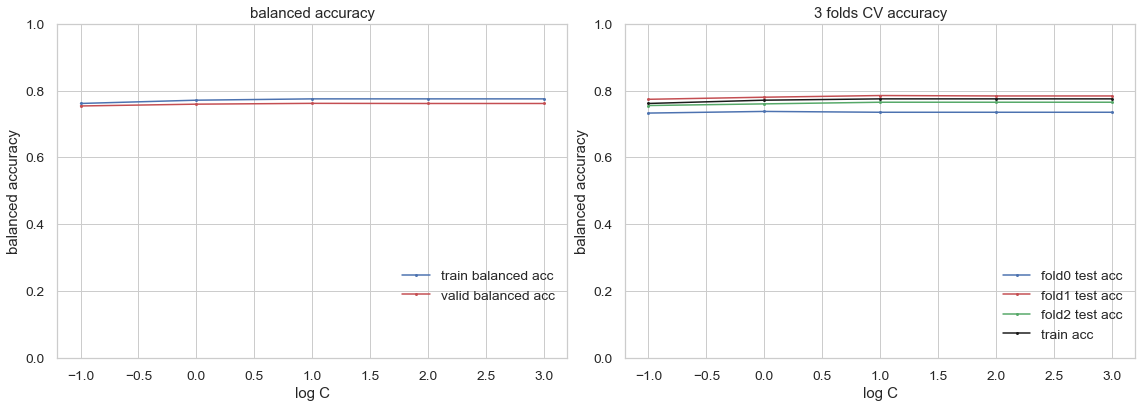

In [406]:
Temp = logistic_search_results_df[logistic_search_results_df.param_max_iter == 100 ]
Temp
fig, ax_grid = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False,figsize=(16, 5.5))
fig.tight_layout()
cur_ax = ax_grid[0]
plt.sca(cur_ax)
cur_ax.set_title('balanced accuracy')
plt.plot([-1,0,1,2,3], Temp['mean_train_score'], 'b.-', label='train balanced acc')
plt.plot([-1,0,1,2,3], Temp['mean_test_score'], 'r.-', label='valid balanced acc')
plt.ylabel('balanced accuracy')
plt.xlabel("log C")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.ylim([0, 1])

cur_ax = ax_grid[1]
plt.sca(cur_ax)
cur_ax.set_title('3 folds CV accuracy')
plt.plot([-1,0,1,2,3], Temp['split0_test_score'], 'b.-', label='fold0 test acc')
plt.plot([-1,0,1,2,3], Temp['split1_test_score'], 'r.-', label='fold1 test acc')
plt.plot([-1,0,1,2,3], Temp['split2_test_score'], 'g.-', label='fold2 test acc')
plt.plot([-1,0,1,2,3], Temp['mean_train_score'], 'k.-', label='train acc')
plt.ylabel('balanced accuracy')
plt.xlabel("log C")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.ylim([0, 1])

In [348]:

plt.style.use('seaborn') # pretty matplotlib plots

import seaborn as sns
sns.set('notebook', style='whitegrid', font_scale=1.25)

In [413]:
forest = sklearn.ensemble.RandomForestClassifier(
    n_estimators=125,
    criterion='gini',
    max_depth=15,
    min_samples_split=2,
    min_samples_leaf=1)

forest_hyperparameter_grid_by_name = dict(
    max_features=[10],
    max_depth=[10,50,100,150,200],
    min_samples_leaf=[1],
    n_estimators=[125],
    random_state=[101],
    )
forest_searcher = sklearn.model_selection.GridSearchCV(
    forest,
    forest_hyperparameter_grid_by_name,
    scoring = 'balanced_accuracy',
    cv = kf,
    return_train_score=True,
    refit=False) # TODO
forest_searcher.fit(vec_list, y_train_df.values.reshape(-1,))
forest_search_results_df = pd.DataFrame(forest_searcher.cv_results_).copy()

In [414]:
print(forest_searcher.best_params_)
print(forest_searcher.best_score_)

{'max_depth': 50, 'max_features': 10, 'min_samples_leaf': 1, 'n_estimators': 125, 'random_state': 101}
0.7483781808963667


In [ ]:
X = BOW_vectorizer.transform(tr_text_list).toarray()

In [437]:
vec_te_list = []
for x in Test_list:
    vec = np.zeros(50,dtype = float)
    for i in range(len(x)):
        try:
            vec += x[i]*word2vec[features_names[i]]
        except:
            pass
    vec_te_list.append(vec)

In [438]:
forest = sklearn.ensemble.RandomForestClassifier(
    n_estimators=125,
    criterion='gini',
    max_depth=50,
    max_features= 10,
    min_samples_split=2,
    min_samples_leaf=1)
forest.fit(vec_list, y_train_df.values.reshape(-1,))

RandomForestClassifier(max_depth=50, max_features=10, n_estimators=125)

In [443]:
x_test_df = pd.read_csv(os.path.join(data_dir, 'x_test.csv'))
Test_list = BOW_vectorizer.transform(x_test_df['text'].values.tolist()).toarray()
yproba_te = logistic.predict(vec_te_list)
np.savetxt('yproba1_test.txt', yproba_te, delimiter='\n')
yproba_te

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [415]:
Temp = forest_search_results_df[forest_search_results_df.param_max_features == 10 ]
Temp

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,param_random_state,params,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.498359,0.020835,0.034377,0.007233,10,10,1,125,101,"{'max_depth': 10, 'max_features': 10, 'min_sam...",...,0.763191,0.719146,0.738311,0.018430,5,0.995609,0.995547,0.996301,0.995819,0.000342
1,1.664018,0.034502,0.035290,0.005399,50,10,1,125,101,"{'max_depth': 50, 'max_features': 10, 'min_sam...",...,0.761633,0.749626,0.748378,0.011366,1,1.000000,1.000000,1.000000,1.000000,0.000000
2,1.789927,0.137878,0.038403,0.004274,100,10,1,125,101,"{'max_depth': 100, 'max_features': 10, 'min_sa...",...,0.761633,0.749626,0.748378,0.011366,1,1.000000,1.000000,1.000000,1.000000,0.000000
3,1.586594,0.053717,0.029725,0.000590,150,10,1,125,101,"{'max_depth': 150, 'max_features': 10, 'min_sa...",...,0.761633,0.749626,0.748378,0.011366,1,1.000000,1.000000,1.000000,1.000000,0.000000
4,1.567210,0.013320,0.029539,0.000656,200,10,1,125,101,"{'max_depth': 200, 'max_features': 10, 'min_sa...",...,0.761633,0.749626,0.748378,0.011366,1,1.000000,1.000000,1.000000,1.000000,0.000000


(0.0, 1.0)

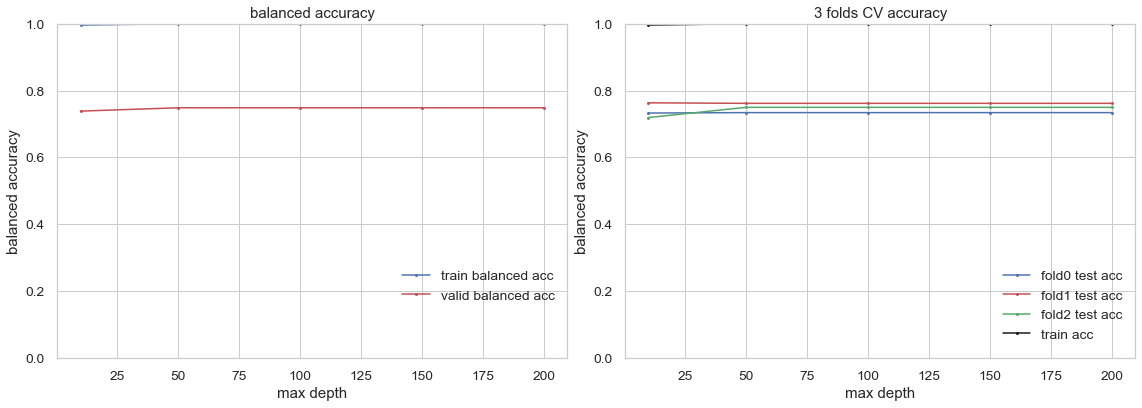

In [416]:
fig, ax_grid = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False,figsize=(16, 5.5))
fig.tight_layout()
cur_ax = ax_grid[0]
plt.sca(cur_ax)
cur_ax.set_title('balanced accuracy')
plt.plot(Temp['param_max_depth'], Temp['mean_train_score'], 'b.-', label='train balanced acc')
plt.plot(Temp['param_max_depth'], Temp['mean_test_score'], 'r.-', label='valid balanced acc')
plt.ylabel('balanced accuracy')
plt.xlabel("max depth")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.ylim([0, 1])

cur_ax = ax_grid[1]
plt.sca(cur_ax)
cur_ax.set_title('3 folds CV accuracy')
plt.plot(Temp['param_max_depth'], Temp['split0_test_score'], 'b.-', label='fold0 test acc')
plt.plot(Temp['param_max_depth'], Temp['split1_test_score'], 'r.-', label='fold1 test acc')
plt.plot(Temp['param_max_depth'], Temp['split2_test_score'], 'g.-', label='fold2 test acc')
plt.plot(Temp['param_max_depth'], Temp['mean_train_score'], 'k.-', label='train acc')
plt.ylabel('balanced accuracy')
plt.xlabel("max depth")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.ylim([0, 1])

In [ ]:
x_test_df = pd.read_csv(os.path.join(data_dir, 'x_test.csv'))
Test_list = BOW_vectorizer.transform(x_test_df['text'].values.tolist()).toarray()
yproba_te = logistic.predict(Test_list)
np.savetxt('yproba1_test.txt', yproba_te, delimiter='\n')
yproba_te

In [419]:
from sklearn.neural_network import MLPClassifier
mpl = MLPClassifier(
        hidden_layer_sizes=50,
        activation='relu',
        alpha=0.0001,
        tol=1e-5,
        n_iter_no_change=50,
        max_iter=3000,
        solver='sgd',
        batch_size=500,
        learning_rate='adaptive', learning_rate_init=0.3, momentum=0.0,
        )

mpl_hyperparameter_grid_by_name = dict(
    batch_size = [100],
    learning_rate_init = [0.3,0.5,1,2,3]
    )
mpl_searcher = sklearn.model_selection.GridSearchCV(
    mpl,
    mpl_hyperparameter_grid_by_name,
    scoring = 'balanced_accuracy',
    cv = kf,
    return_train_score=True,
    refit=False) # TODO
mpl_searcher.fit(vec_list, y_train_df.values.reshape(-1,))
mpl_search_results_df = pd.DataFrame(mpl_searcher.cv_results_).copy()

/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converge

In [420]:
print(mpl_searcher.best_params_)
print(mpl_searcher.best_score_)

{'batch_size': 100, 'learning_rate_init': 0.3}
0.7178780771135503


In [418]:
mpl = MLPClassifier(
        hidden_layer_sizes=50,
        activation='relu',
        alpha=0.0001,
        tol=1e-5,
        n_iter_no_change=50,
        max_iter=1000,
        solver='sgd',
        batch_size=100,
        learning_rate='adaptive', learning_rate_init=0.3, momentum=0.0,
        )
mpl.fit(vec_list, y_train_df.values.reshape(-1,))


/opt/anaconda3/envs/comp135_2020f_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=100, hidden_layer_sizes=50, learning_rate='adaptive',
              learning_rate_init=0.3, max_iter=1000, momentum=0.0,
              n_iter_no_change=50, solver='sgd', tol=1e-05)